This is the <a href="https://jupyter.org/">Jupyter Notebook</a>, an interactive coding and computation environment. For this lab, you do not have to write any code, you will only be running it. 

To use the notebook:
- "Shift + Enter" runs the code within the cell (so does the forward arrow button near the top of the document)
- You can alter variables and re-run cells
- If you want to start with a clean slate, restart the Kernel either by going to the top, clicking on Kernel: Restart, or by "esc + 00" (if you do this, you will need to re-run the following block of code before running any other cells in the notebook) 

This notebook uses code adapted from 

SimPEG
- Cockett, R., S. Kang, L.J. Heagy, A. Pidlisecky, D.W. Oldenburg (2015, in review), SimPEG: An open source framework for simulation and gradient based parameter estimation in geophysical applications. Computers and Geosciences


## View the model

- dx: width or prism in x-direction (m)
- dy: width of prism in y-direction (m)
- dz: vertical extent of prism (m)
- depth: depth to the top of the prism (m)
- pinc: inclination of the prism (reference is a unit northing vector; degrees)
- pdec: declination of the prism (reference is a unit northing vector; degrees)
- View_elev: elevation of view (degrees)
- View_azim: azimuth of view (degrees)

In [1]:
from gpgLabs.Mag import *
from SimPEG import PF, Utils, Mesh
%matplotlib inline

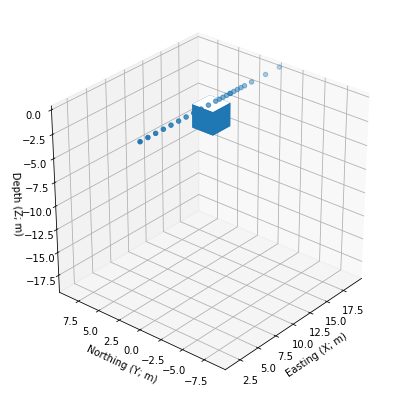

In [2]:
#Input parameters
inp_dir = '../assets/Mag/data/'
fileName = 'Lab1_Wednesday_TA.csv'

data = np.genfromtxt(inp_dir + fileName, skip_header=1, delimiter=',')
xyzd = np.c_[data[:,0], np.zeros((data.shape[0],2)), data[:,1]]
B = np.r_[60308, 83.8, 25.4]

survey = Mag.createMagSurvey(xyzd, B)
# View the data and chose a profile
# Define the parametric model interactively
model = Simulator.ViewPrism(survey)
display(model)

## Fit the data

- data: data set to load
    - MonSt: Monday Student data
    - WedTA: Wednesday TA data
    - WedSt: Wednesday Student data
- B0: background field (nT) to be subtracted from the data to define the anomaly
- x0: center of the rebar (along-line) 
- depth: depth to the top of the rebar (m)
- susc: magnetic susceptibility
- Q: Koenigsberger ratio ($\frac{M_{rem}}{M_{ind}}$)
- rinc: inclination of the remanent magnetization (degree)
- rdec: declination of the remanent magnetization (degree)

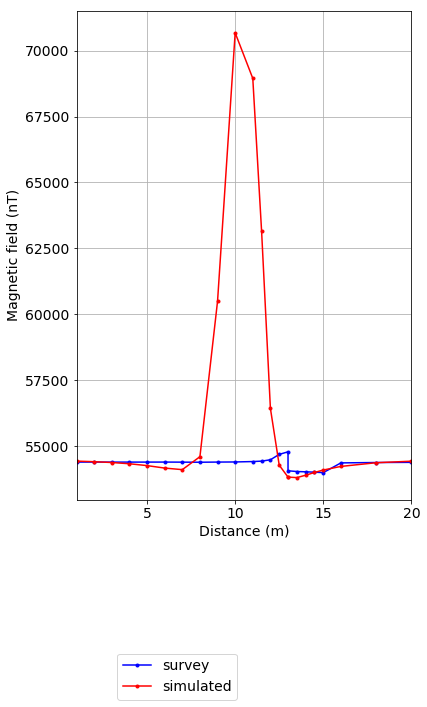

True

In [3]:
Q = Simulator.fitline(model,survey)
display(Q)